<a href="https://colab.research.google.com/github/Zobaid/Youtube_Comment_Extraction_and_NLP/blob/master/youtube_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%cd "./gdrive/My Drive/Colab Notebooks/Youtube_Scrapper/Youtube_comment_nlp/"
!ls -l

/content/gdrive/My Drive/Colab Notebooks/Youtube_Scrapper/Youtube_comment_nlp
total 8985
-rw------- 1 root root    2431 Jul 17 09:14 addidas2.csv
-rw------- 1 root root   89104 Jul 17 09:57 addidas3.csv
-rw------- 1 root root   59712 Jul 17 08:52 addidas.csv
-rw------- 1 root root 9036288 May 27 17:50 chromedriver.exe
drwx------ 2 root root    4096 Jul 19 16:31 Results
-rw------- 1 root root    2345 Jul 17 13:48 srapwithbs4.py
-rw------- 1 root root    2418 Jul 17 10:03 youtube_nlp.py
-rw------- 1 root root    2059 Jul 19 16:30 youtube_scraping.py


In [3]:
!pip install selenium bs4

     |████████████████████████████████| 911kB 7.6MB/s 


In [4]:
import time
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup 
import requests 

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.webite-url.com")

#change the url according **to**

In [10]:
url="https://www.youtube.com/watch?v=icetLikj7XY"
data=[]

##with Chrome('/content/gdrive/My Drive/Colab Notebooks/Youtube_Scrapper/Youtube_comment_nlp/chromedriver.exe') as driver:
wait = WebDriverWait(wd,5)
    #driver.get(url)
wd.get(url)
for item in range(190): 
  wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
  time.sleep(10)

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content-text"))):
  data.append(comment.text)

Tried with Beatiful soup.. Does not **work** ****

In [ ]:
    	# getting the request from url 
#r = requests.get(url) 
    	
    	# converting the text 
#s = BeautifulSoup(r.text, "html.parser") 
    	
    	# finding meta info for title 
#title = s.find("span", class_="watch-title").text.replace("\n", "") 
    	
    	# finding meta info for views 
#views = s.find("div", class_="watch-view-count").text 
    	
    	# finding meta info for likes 
#likes = s.find("span", class_="like-button-renderer").span.button.text 
    	
    	# saving this data in dictionary 
#datas = {'title':title, 'views':views, 'likes':likes} 
#number_of_likes = driver.find_element_by_xpath("#top-level-buttons > ytd-toggle-button-renderer:nth-child(1) > a > yt-formatted-string").text
    	
    	# returning the dictionary 

In [11]:
#APPEND THE DICT TO PANDAS DATAFRAME
import pandas as pd   
df = pd.DataFrame(data, columns=['comment'])
#dfs=pd.DataFrame(datas,columns=['title','views','likes'])
    
df.to_csv(r'addidas3.csv',index=False, header=True) 
#dfs.to_csv(r'addidas3a.csv',index=False, header=True)   
#print(number_of_likes)
df.head()
    

,comment
0,Yo! The adidas Ultra Boost is now on sale for ...
1,I don't need reasons...I need money 🤣
2,Adidas should treat this shoes as classics lik...
3,I’ve had Nike’s my whole life. Just recently I...
4,Cop some groceries


Then just run the nlp python file

In [ ]:
!python youtube_nlp.py

youtube nlp python script to ipynb format

In [21]:
#!pip install nltk
#import nltk
#nltk.download('stopwords')
nltk.download('WordNet')
#nltk.download('TextBlob')

[nltk_data] Error loading WordNet: Package 'WordNet' not found in
[nltk_data]     index


False

In [14]:
#Import packages and data
import pandas as pd
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob

df=pd.read_csv('addidas3.csv')

##### DATA CLEANING ########
sw = stopwords.words('english')

def clean_text(text):

    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[^a-zA-Z ]+", "", text)
    
    #Tokenize the data
    text = nltk.word_tokenize(text)
    #Remove stopwords
    text = [w for w in text if w not in sw]

    return text

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Applying the cleaning function to data
df['comment'] = df['comment'].apply(lambda x: clean_text(x))

In [23]:

#Lemmatizer
lemmatizer = WordNetLemmatizer()
def lem(text):
    text = [lemmatizer.lemmatize(t) for t in text]
    text = [lemmatizer.lemmatize(t, 'v') for t in text]

    return text

df['comment'] = df['comment'].apply(lambda x: lem(x))

In [28]:
#Remove all empty comments
empty_comment = df['comment'][797]

for i in range(len(df)):
    if df['comment'][i]==empty_comment:
        df=df.drop(i)

df=df.reset_index(drop=True)

In [29]:
#From lists to single list       
all_words=[]        
for i in range(len(df)):
    all_words = all_words + df['comment'][i]

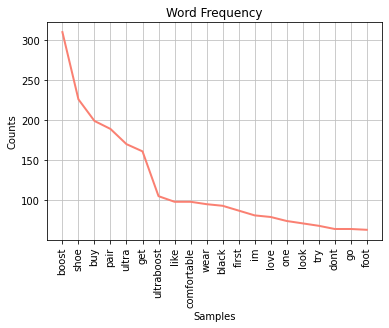

In [30]:
#Get word frequency        
nlp_words = nltk.FreqDist(all_words)
nlp_words.plot(20, color='salmon', title='Word Frequency')

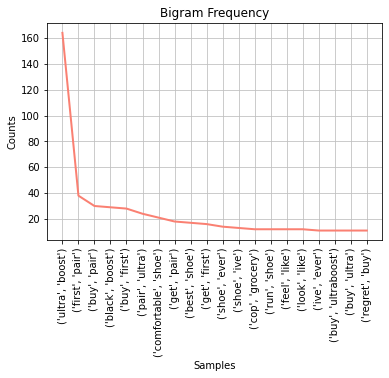

In [31]:
#Bigrams
bigrm = list(nltk.bigrams(all_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')

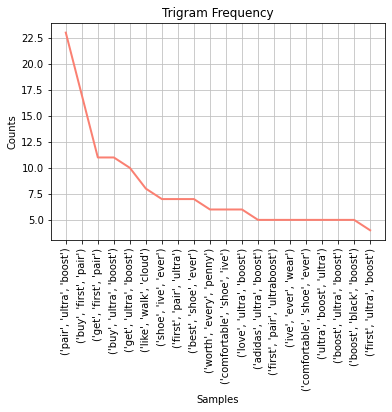

In [32]:
#Trigrams
trigrm = list(nltk.trigrams(all_words))
words_3 = nltk.FreqDist(trigrm)
words_3.plot(20, color='salmon', title='Trigram Frequency')

In [ ]:
sentiment = []
for i in range(len(df)):
    blob = TextBlob(df['comment'][i])
    for sentence in blob.sentences:
        sentiment.append(sentence.sentiment.polarity)

df['sentiment']=sentiment
df['sentiment'].plot(color='salmon', title='Comments Polarity')
        
#Basic stats
#df['sentiment'].describe()
#nlp_words['criminal']

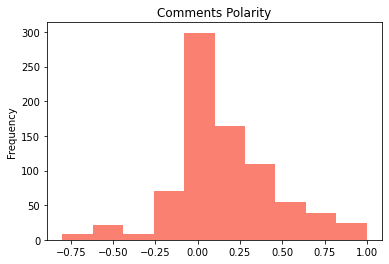

In [36]:
#Get sentiment from comments
df['comment'] = [str(thing) for thing in df['comment']]
sentiment = []
for i in range(len(df)):
    blob = TextBlob(df['comment'][i])
    for sentence in blob.sentences:
        sentiment.append(sentence.sentiment.polarity)
df['sentiment']=sentiment
#Plot
df['sentiment'].plot.hist(color='salmon', title='Comments Polarity')